In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
df_email = pd.read_csv('output7_new_sentiment.csv',index_col = 0)
from_list = df_email['From'].values.tolist()
for i in range(len(from_list)):
    from_list[i] = eval(from_list[i])
df_email['From'] = from_list

to_list = df_email['To'].values.tolist()
for i in range(len(to_list)):
    to_list[i] = eval(to_list[i])
df_email['To'] = to_list

cc_list = df_email['CC'].values.tolist()
for i in range(len(cc_list)):
    cc_list[i] = eval(cc_list[i])
df_email['CC'] = cc_list

unique_people = set()
for i in range(len(from_list)):
    unique_people.add(from_list[i])

for i in range(len(cc_list)):
    for lst in cc_list[i]:
        unique_people.add(lst)

for i in range(len(to_list)):
    for lst in to_list[i]:
        unique_people.add(lst)
unique_people = list(unique_people)
unique_people.sort()
# name2id, id2name = nameToIndexDict(unique_people)

len(unique_people)



38069

# cra/commisioners and gov are known

In [3]:
# cra and comm

cra_list = [('john', 'dailey', 'john_dailey'),
                ('bryan', 'desloge', 'bryan@deslogemedical.com'),
                ('commissionerbryan', 'desloge', 'commissionerbryan_desloge'),
                ('bryan', 'desloge', 'desloge.bryan@gmail.com'),
                ('bryan', 'desloge', 'deslogeb@leoncountyfl.gov'),
                ('jessica', 'miller', 'jessica.miller@talgov.com'),
                ('jane', 'sauls', 'jane_sauls'),
                ('nick', 'maddox', 'maddox.nicholas@gmail.com'),
                ('nick', 'maddox', 'maddoxn@leoncountyfl.gov'),
                ('mary ann lindley', '', 'lindleym@leoncountyfl.gov'),
                ('maryann', 'lindley', 'maryann_lindley'),
                ('mary', 'lindley', 'mary_lindley'),
                ('kristin', '', 'kristindozier@gmail.com'),
                ('kristen', 'dozier', 'kristen_dozier'),
                ('kristin', 'dozer', 'kristin_dozer'),
                ('kristin', 'dozier', 'dozierk@leoncountyfl.gov'),
                ('bill', 'proctor', 'proctorb@leoncountyfl.gov'),

                ('bryandesloge', '', 'bryandesloge_')
              ]


commissioner_list = [('scoi', 'maddox', 'scoi.maddox@talgov.com'),
                        ('scott', 'maddox', 'maddox@maddoxhorne.com'),
                        ('scott', 'mattox', 'scott@govinc.net'),
                        ('scott', 'maddox', 'scottcharlesmaddox@gmail.com'),
                        ('scott', 'maddox', 'scott@scottmaddox.com'),
                        ('scott', 'maddox', 'shamaddox@embarqmail.com'),
                        ('scott', 'maddox', 'scott.maddox@talgov.com'),
                        ('scof', 'maddox', 'scof.maddox@talgov.com'),
                        ('scos', 'maddox', 'scos.maddox@talgov.com'),
                        ('sha', 'maddox', 'sha_maddox'),
                        ('andrew', 'gillum', 'ademetricg@gmail.com'),
                        ('andrew', 'gillum', 'agillum@pfaw.org'),
                        ('commissionerandrew', 'gillum', 'commissionerandrew_gillum'),
                        ('andrew', 'gilliam', 'andrew_gilliam'),
                        ('andrew', 'gillium', 'andrew_gillium'),
                        ('andrew', 'gillum', 'andrew@andrewgillum.com'),
                        ('andrew', 'gillum', 'gilluma@talgov.com'),
                        ('andrew', 'gillum', 'andrew.gillum@talgov.com'),
                        ('andrew', 'gillams', 'andrew_gillams'),
                        ('mark', 'mustian', 'mmustian@ngnlaw.com'),
                        ('f11332', 'l11332', 'mark@markmustian.com'),
                        ('f11334', 'l11334', 'mark@markmustian.com'),
                        ('mark', 'mustian', 'mmustian@ngn-tally.com'),
                        ('f11333', 'l11333', 'mark@markmustian.com'),
                        ('gil', 'ziffer', 'gil@ziffberry.com'),
                        ('gil', 'ziffer', 'gil.ziffer@talgov.com'),
                        ('curtis', 'richardsom', 'curtis_richardsom'),
                        ('curus', 'richardson', 'curus.richardson@talgov.com'),
                        ('ultis', 'richardson', 'ultis_richardson'),
                        ('curtis', 'richardson', 'cabaide@aol.com'),
                        ('nancy', 'miller', 'jacqueline.hightower@famu.edu'),
                        ('nancy', 'miller', 'nancy.miller@talgov.com'),
                        ('john', 'marks', 'john.marksiii@talgov.com'),
                        ('john', 'marks', 'john.marks@talgov.com'),

                        ('nancymiller', '', 'nancymiller_'),
                         ('gillum,andrew', '', 'gillum,andrew_'),
                         ('gilziffer', '', 'gilziffer_'),
                         ('ziﬀer, gil', ' ', 'ziﬀer, gil_ '),
                         ('ziffer,gil', '', 'ziffer,gil_'),
                         ('marks,john', '', 'marks,john_'),
                         ('johnmarks', '', 'marksj@talgov.com'),
                         ('maddox,scott', '', 'maddox,scott_'),
                         ('f4395', 'l4395', 'scott@scottmaddox2012.com'),
                         ('curtisrichardson', '', 'curtisrichardson_'),
                         ('curts richardson@talgov.com', ' ', 'curts richardson@talgov.com_ '),
                         ('f15045', 'l15045', 'curts.richardson@talgov.com'),
                         ('miller,nancy', '', 'miller,nancy_'),

                        ]
cra_comm_list = cra_list + commissioner_list

In [4]:
cra_comm_idx_list = []
for i,people in enumerate(unique_people):
    if people in cra_comm_list:
        cra_comm_idx_list.append(i)

In [5]:
# gov
df_org=pd.read_excel('emails-combine 06162020.xlsx',sheet_name=0,usecols=[1,2,3,15,19,23])
gorvenment_people_list = []
for i in range(len(df_org)):
    row = df_org.iloc[i]
    if pd.isnull(row['First']):
        continue
    first = str(row['First']).lower().strip()
    last = str(row['Last']).lower().strip()
    if pd.isnull(row['Email']):
        email = first + '_' + last
    else:
        email = row['Email'].lower().strip()
    if row['Organization1'] is not np.nan:
        if 'Tallahassee' in row['Organization1'] or 'Leon County' in row['Organization1']:
            gorvenment_people_list.append( (first, last, email) )
            continue
    if row['Organization 2'] is not np.nan:
        if 'Tallahassee' in row['Organization 2'] or 'Leon County' in row['Organization 2']:
            gorvenment_people_list.append( (first, last, email) )
            continue
    if row['Organization 3'] is not np.nan:
        if 'Tallahassee' in row['Organization 3'] or 'Leon County' in row['Organization 3']:
            gorvenment_people_list.append( (first, last, email) )
            continue

In [6]:
government_idx_list = []
for i,people in enumerate(unique_people):
    for j,people2 in enumerate(gorvenment_people_list):
        if people[2] == people2[2] or (people[0] == people2[0] and people[1] == people2[1]) \
            or 'talgov.com' in people[2] or 'leoncountyfl.gov' in people[2] or 'tallahassee.com' in people[2]:
            if i not in cra_comm_idx_list:
                government_idx_list.append(i)
#                 print(people)
                break
    

In [7]:
re_extension = re.compile('\@([0-9a-z\.]+)')
re_email = re.compile('([0-9a-z\.\_]+\@[0-9a-z\.]+)')

In [8]:
extension_dic = {}
for i,people in enumerate(unique_people):
    if i not in government_idx_list and i not in cra_comm_idx_list:
        if '@' in people[2]:
            if people[2].count('@') == 1:
                try:
                    extension = re_extension.findall(people[2].replace(' ', ''))[0]
                    email = re_email.findall(people[2].replace(' ', ''))[0]
                    if extension not in extension_dic:
                        extension_dic[extension] = []

                    extension_dic[extension].append(email)
                except:
                    print('might be OCR error:', people[2])

might be OCR error: claudia.blackburn@ﬂhealth.gov_
might be OCR error: ronsaﬀ@aol.com
might be OCR error: gail.stewart@ﬂhealth.gov_
might be OCR error: holly.kirsch@ﬂhealth.gov_
might be OCR error: marc@_
might be OCR error: monqord.bill.web@ﬂsenate.gov_
might be OCR error: monzord.bill.web@ﬂsenate.gov_
might be OCR error: mw@_
might be OCR error: nancy.miller@_
might be OCR error: negron.joe.web@ﬂsenate.gov_
might be OCR error: paresh.master@_
might be OCR error: rdaws@_
might be OCR error: ring.jeremy.web@ﬂsenate.gov_
might be OCR error: ron.hall@ﬁrstdata.com_
might be OCR error: sam.macdonell@ﬂhealth.gov_
might be OCR error: tflanigan@_


# save into excel

In [21]:
# remove duplicates
for k,v in extension_dic.items():
    extension_dic[k] = list(set(v))

In [22]:
# sort by num of email addresses
sorted_extension_groups = sorted(extension_dic.items(), key = lambda x:len(x[1]), reverse=True)

In [23]:
extensions = []
lengths = []
for g in sorted_extension_groups:
    extensions.append(g[0])
    lengths.append(len(g[1]))


In [54]:
df = pd.DataFrame()
df['index'] = np.arange(lengths[0])
df[extensions[0]] = extension_dic[extensions[0]]
for i in range(1, 200):
    df_temp = pd.DataFrame()
    df_temp['index'] = np.arange(lengths[i])
    df_temp[extensions[i]] = extension_dic[extensions[i]]
    df = df.merge(df_temp, how ='left')

In [55]:
df = df.fillna('')
df

,index,gmail.com,yahoo.com,comcast.net,aol.com,hotmail.com,embarqmail.com,fsu.edu,famu.edu,earthlink.net,...,alofthotels.com,bbbsbigbend.org,bmolaw.com,fbctlh.org,apalacheecenter.org,chemringordnance.com,marriott.com,southern,childers,inoviagroup.com
0,0,heidi.vernon06@gmail.com,derrywilliams29@yahoo.com,musketeerb23@comcast.net,jwalton409@aol.com,bryantvernon@hotmail.com,carmen.butler@embarqmail.com,mwaldeck@fsu.edu,richard.givens@famu.edu,azim@earthlink.net,...,natalia.pagan@alofthotels.com,alva@bbbsbigbend.org,rhanna@bmolaw.com,swofford@fbctlh.org,melanyk@apalacheecenter.org,gibave@chemringordnance.com,jenny.dorminy@marriott.com,fakha@southern,mark@childers,rtl@inoviagroup.com
1,1,boydjoe7@gmail.com,tawannaburk@yahoo.com,buddstir@comcast.net,bmssqc1@aol.com,brianaccardo@hotmail.com,garcia.tong@embarqmail.com,crey@fsu.edu,reginald.perry@famu.edu,jsigler1121@earthlink.net,...,brien.schmauch@alofthotels.com,jeanie@bbbsbigbend.org,fspringer@bmolaw.com,john@fbctlh.org,angelah@apalacheecenter.org,kbrooks@chemringordnance.com,keith.hoogerheyde@marriott.com,dasmi@southern,van@childers,lpl@inoviagroup.com
2,2,laurakathryn88@gmail.com,cgp2391@yahoo.com,kenneth.adams@comcast.net,geosyb@aol.com,quinn_dobbins@hotmail.com,dpzz2@embarqmail.com,bfairhurst@fsu.edu,abena.ojetayo@famu.edu,dhpconsulting@earthlink.net,...,terry.daniel@alofthotels.com,kristie.teal@bbbsbigbend.org,george@bmolaw.com,clint@fbctlh.org,jayr@apalacheecenter.org,dkrejcar@chemringordnance.com,rosemary.sullivan@marriott.com,wabat@southern,jgassett@childers,jlm@inoviagroup.com
3,3,ronbook41@gmail.com,sharonaharrell@yahoo.com,mkramer05@comcast.net,fourdeezz@aol.com,cmikyska@hotmail.com,npi@embarqmail.com,mmartin2@fsu.edu,constance.thomas@famu.edu,hiwit@earthlink.net,...,patsy.pagan@alofthotels.com,tanesha.mcdonald@bbbsbigbend.org,croth@bmolaw.com,tsmith@fbctlh.org,kimo@apalacheecenter.org,kfunkhouser@chemringordnance.com,ri.tlhdt.gm@marriott.com,frgre@southern,jason@childers,jfw@inoviagroup.com
4,4,lashonnaaustin@gmail.com,marktrimble61@yahoo.com,emily.oasis@comcast.net,plantman30@aol.com,celestialgrace117@hotmail.com,dansbypc@embarqmail.com,dmacosta@fsu.edu,sandra.suther@famu.edu,mteal@earthlink.net,...,pasty.pagan@alofthotels.com,melanie@bbbsbigbend.org,fralston@bmolaw.com,amy@fbctlh.org,jonw@apalacheecenter.org,fadams@chemringordnance.com,tlh.north.dos@marriott.com,macox@southern,childers@childers,wlp@inoviagroup.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,1830,annette.pearce@gmail.com,,,,,,,,,...,,,,,,,,,,
1831,1831,markworleyyfb@gmail.com,,,,,,,,,...,,,,,,,,,,
1832,1832,kwilhelmina@gmail.com,,,,,,,,,...,,,,,,,,,,
1833,1833,holis.o.secretary@gmail.com,,,,,,,,,...,,,,,,,,,,


In [56]:
df.to_csv('top 200 email extensions.csv')

In [27]:
target = 'karen.botino@northhighland.com'
for i,people in enumerate(unique_people):
    if target in people[2]:
        print(people)

('f12508', 'l12508', 'karen.botino@northhighland.com')
('f12861', 'l12861', 'karen.botino@northhighland.com')


# plot

In [28]:
sum(lengths)

13193

In [29]:
lengths[0]

1835

In [30]:
len(extensions)

3742

In [31]:
sum(np.array(lengths) > 1)

1102

In [35]:
%matplotlib inline
# %matplotlib notebook

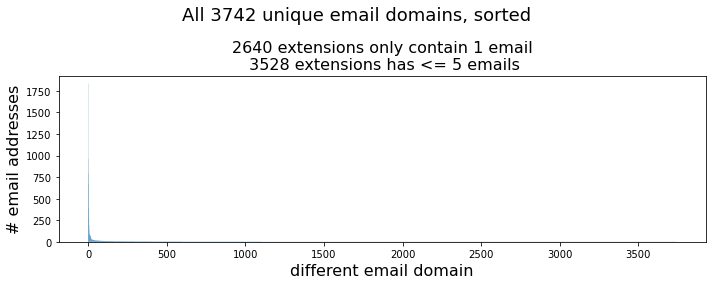

In [52]:
x = np.arange(len(extensions))
plt.figure(figsize = (10,4))
plt.bar(x, lengths, width=1, snap=False)
plt.suptitle(f'All {len(extensions)} unique email domains, sorted', fontsize = 18)
plt.title(f'{sum(np.array(lengths) == 1)} extensions only contain 1 email\n {sum(np.array(lengths) <= 5)} extensions has <= 5 emails', fontsize = 16)
plt.xlabel('different email domain', fontsize = 16)
plt.ylabel('# email addresses', fontsize = 16)
plt.tight_layout()
plt.show()

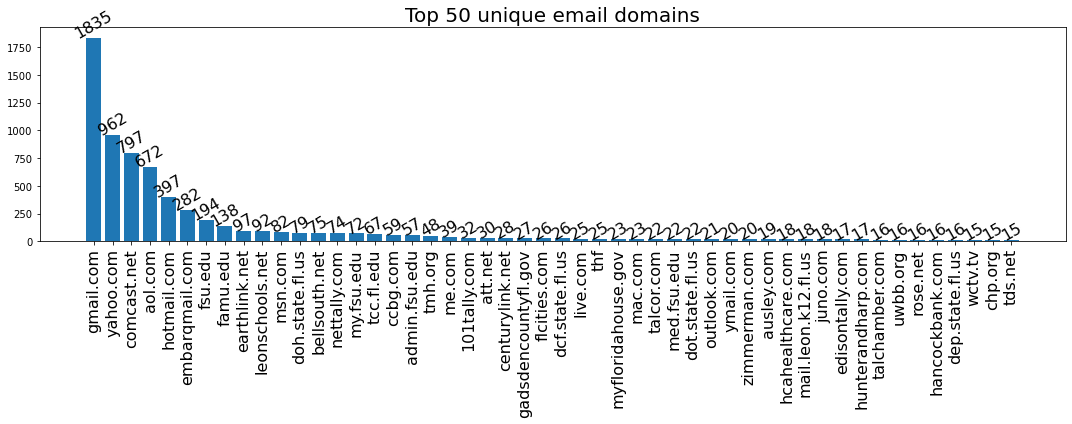

In [53]:
top_n = 50
x = np.arange(top_n)
plt.figure(figsize = (15,6))
plt.bar(x,lengths[:top_n])
plt.xticks(ticks = x, labels=extensions[:top_n], rotation = 90, fontsize = 16)
for i in range(top_n):
    plt.annotate(lengths[i], (x[i],lengths[i]), ha='center', fontsize = 16, rotation = 30)
plt.title(f'Top {top_n} unique email domains', fontsize = 20)
plt.tight_layout()
plt.show()